In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_abtest = pd.read_csv('df_abtest.csv')

In [5]:
# Check the result
df_abtest.head()

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts_x,bal_x,calls_6_mnth_x,logons_6_mnth_x,...,process_step,date_time,source,num_steps,session_duration_sec,num_accts_y,bal_y,calls_6_mnth_y,logons_6_mnth_y,num_sessions
0,6265388,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0,...,start,2017-04-15 15:13:33,part1,6,194.0,4.0,214896.6,30.0,48.0,1
1,6265388,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0,...,step_1,2017-04-15 15:13:46,part1,6,194.0,4.0,214896.6,30.0,48.0,1
2,6265388,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0,...,step_2,2017-04-15 15:14:21,part1,6,194.0,4.0,214896.6,30.0,48.0,1
3,6265388,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0,...,step_3,2017-04-15 15:15:50,part1,6,194.0,4.0,214896.6,30.0,48.0,1
4,6265388,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0,...,confirm,2017-04-15 15:16:18,part1,6,194.0,4.0,214896.6,30.0,48.0,1


In [6]:
df_abtest.shape

(317235, 22)

In [7]:
# Number of rows per variation
rows_per_group = df_abtest['Variation'].value_counts()
print("Rows per group:\n", rows_per_group)

# Number of unique clients per variation
clients_per_group = df_abtest.groupby('Variation')['client_id'].nunique()
print("\nUnique clients per group:\n", clients_per_group)

# Number of unique visits per variation
visits_per_group = df_abtest.groupby('Variation')['visit_id'].nunique()
print("\nUnique visits per group:\n", visits_per_group)


Rows per group:
 Variation
Test       176699
Control    140536
Name: count, dtype: int64

Unique clients per group:
 Variation
Control    23532
Test       26968
Name: client_id, dtype: int64

Unique visits per group:
 Variation
Control    32189
Test       37136
Name: visit_id, dtype: int64


In [8]:
# Sessions completed (reaching 'confirm')
completed_sessions = df_abtest[df_abtest['process_step']=='confirm']['visit_id'].nunique()
total_sessions = df_abtest['visit_id'].nunique()
completion_rate = completed_sessions/total_sessions*100
print(f"Session completion rate: {completion_rate:.2f}%")

Session completion rate: 54.45%


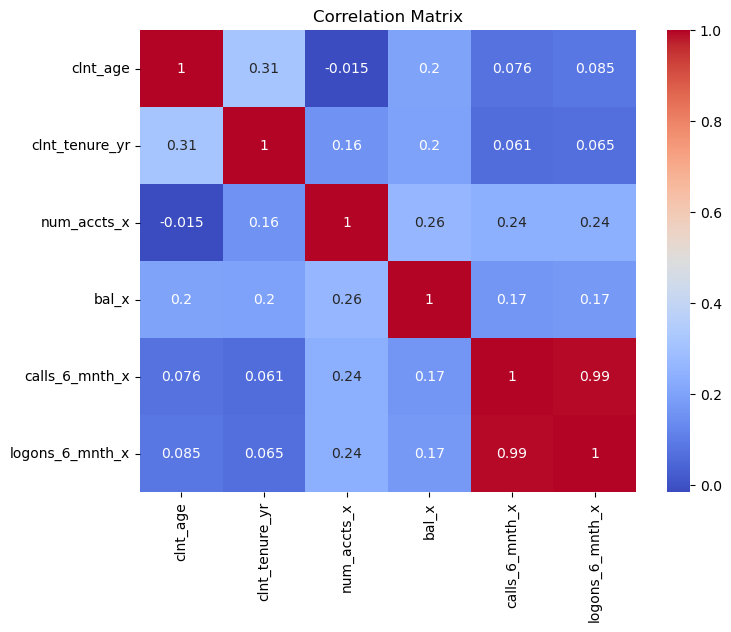

In [9]:
# Correlation heatmap
behavior_cols = ['clnt_age','clnt_tenure_yr','num_accts_x','bal_x','calls_6_mnth_x','logons_6_mnth_x']
plt.figure(figsize=(8,6))
sns.heatmap(df_abtest[behavior_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_28532/2037648583.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='visit_id', y='process_step', data=funnel, palette='viridis')


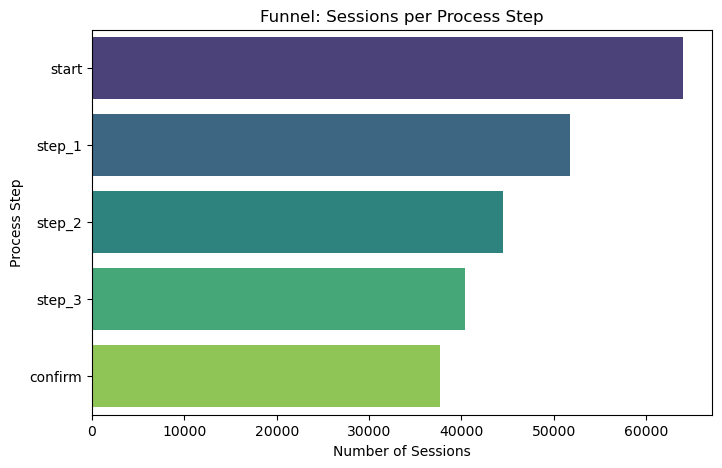

In [10]:
# Funnel visualization
funnel = df_abtest.groupby('process_step')['visit_id'].nunique().reset_index().sort_values(by='visit_id', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='visit_id', y='process_step', data=funnel, palette='viridis')
plt.xlabel('Number of Sessions')
plt.ylabel('Process Step')
plt.title('Funnel: Sessions per Process Step')
plt.show()

In [11]:
# Visitor_id → split into 2 parts
df_abtest[['visitor_main', 'visitor_sub']] = df_abtest['visitor_id'].str.split('_', expand=True)

# Visit_id → split into 3 parts
df_abtest[['visit_main', 'visit_sub1', 'visit_sub2']] = df_abtest['visit_id'].str.split('_', expand=True)

# Convert to numeric (safe conversion, NaN if not possible)
cols_to_numeric = ['visitor_main','visitor_sub','visit_main','visit_sub1','visit_sub2']
df_abtest[cols_to_numeric] = df_abtest[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

# visitor_simple → unique integer per visitor
df_abtest['visitor_simple'] = df_abtest['visitor_id'].astype('category').cat.codes

# visit_simple → unique integer per visit/session
df_abtest['visit_simple'] = df_abtest['visit_id'].astype('category').cat.codes

In [12]:
df_abtest

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts_x,bal_x,calls_6_mnth_x,logons_6_mnth_x,...,calls_6_mnth_y,logons_6_mnth_y,num_sessions,visitor_main,visitor_sub,visit_main,visit_sub1,visit_sub2,visitor_simple,visit_simple
0,6265388,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0,...,30.0,48.0,1,100019786,4272121951,703380671,89376183829,330646,0,46398
1,6265388,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0,...,30.0,48.0,1,100019786,4272121951,703380671,89376183829,330646,0,46398
2,6265388,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0,...,30.0,48.0,1,100019786,4272121951,703380671,89376183829,330646,0,46398
3,6265388,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0,...,30.0,48.0,1,100019786,4272121951,703380671,89376183829,330646,0,46398
4,6265388,Test,7.0,94.0,42.5,U,4.0,214896.6,5.0,8.0,...,30.0,48.0,1,100019786,4272121951,703380671,89376183829,330646,0,46398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317230,7042750,Control,14.0,178.0,67.5,M,2.0,108406.1,4.0,7.0,...,36.0,63.0,1,999998529,89539814462,583327415,19513940564,488564,56010,37008
317231,7042750,Control,14.0,178.0,67.5,M,2.0,108406.1,4.0,7.0,...,36.0,63.0,1,999998529,89539814462,583327415,19513940564,488564,56010,37008
317232,7042750,Control,14.0,178.0,67.5,M,2.0,108406.1,4.0,7.0,...,36.0,63.0,1,999998529,89539814462,583327415,19513940564,488564,56010,37008
317233,7042750,Control,14.0,178.0,67.5,M,2.0,108406.1,4.0,7.0,...,36.0,63.0,1,999998529,89539814462,583327415,19513940564,488564,56010,37008


In [13]:
print("\n=== DF_ABTEST ===")
print("Unique visitors:", df_abtest['visitor_simple'].nunique())
print("Unique visits:", df_abtest['visit_simple'].nunique())

print("\nVisits per visitor (mean, median):")
print(df_abtest.groupby('visitor_simple')['visit_simple'].nunique().agg(['mean','median']))

print("\nSteps per visit (mean, median):")
print(df_abtest.groupby('visit_simple')['process_step'].count().agg(['mean','median']))


=== DF_ABTEST ===
Unique visitors: 56011
Unique visits: 69205

Visits per visitor (mean, median):
mean      1.235561
median    1.000000
Name: visit_simple, dtype: float64

Steps per visit (mean, median):
mean      4.58399
median    5.00000
Name: process_step, dtype: float64


- df_abtest has 56,011 unique visitors and 69,205 visits → ratio ~1.23 visits per visitor.

👉This indicates that most customers only appear once (median = 1), but there is a small group that repeats (hence the mean is > 1).

- Each visit contains an average of 4.6 steps in abtest.
- The median = 5 steps, which matches the classic funnel:
    start → step_1 → step_2 → step_3 → confirm.
    
👉 This means that most visits complete the entire journey, but some abandon it earlier.

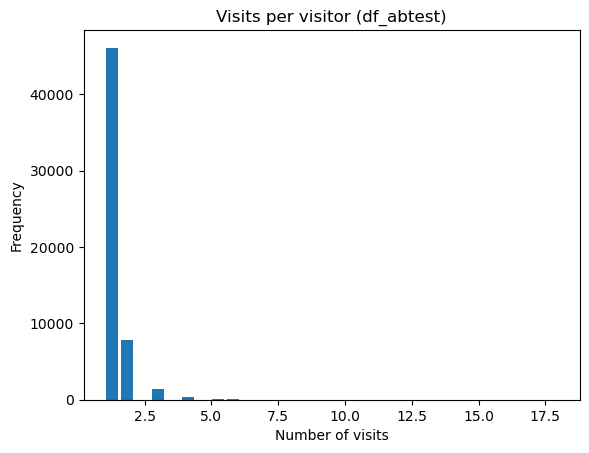

In [14]:
# Visits per visitor
df_abtest.groupby("visitor_simple")["visit_simple"].nunique().plot.hist(bins=30, rwidth=0.8)
plt.title("Visits per visitor (df_abtest)")
plt.xlabel("Number of visits")
plt.ylabel("Frequency")
plt.show()

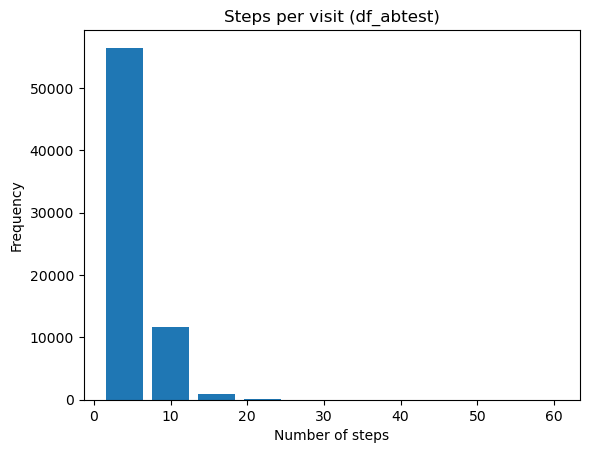

In [15]:
# Steps per visit
df_abtest.groupby("visit_simple")["process_step"].count().plot.hist(bins=10, rwidth=0.8)
plt.title("Steps per visit (df_abtest)")
plt.xlabel("Number of steps")
plt.ylabel("Frequency")
plt.show()

process_step
confirm    34922
start      54465
step_1     46623
step_2     41988
step_3     38819
Name: visitor_simple, dtype: int64
Variation     Control   Test
process_step                
confirm         15566  19505
start           25908  28736
step_1          21234  25554
step_2          19165  22978
step_3          17699  21270


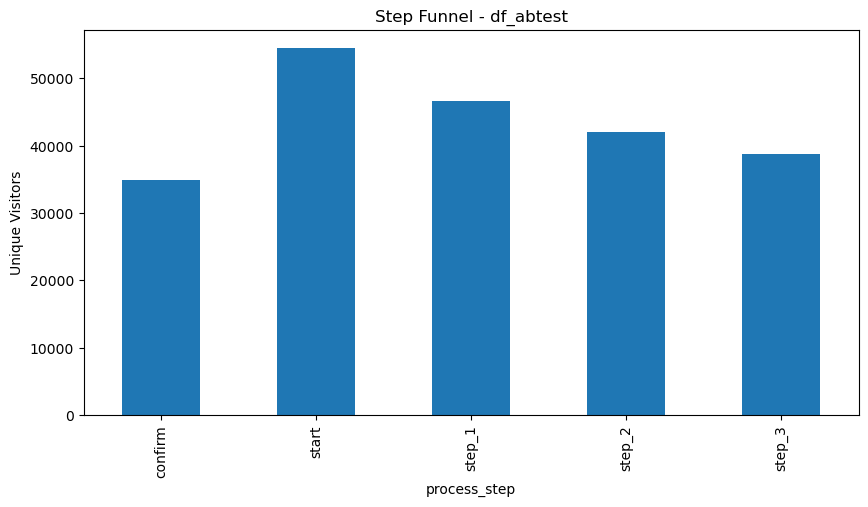

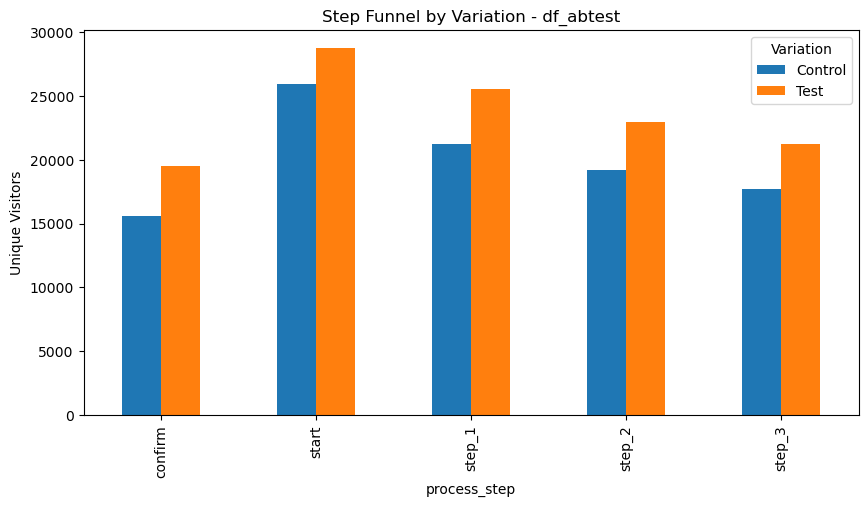

In [16]:
# Count number of unique visitors at each step
funnel_abtest = df_abtest.groupby('process_step')['visitor_simple'].nunique().sort_index()
print(funnel_abtest)

# Funnel by Variation
funnel_abtest_variation = df_abtest.groupby(['Variation', 'process_step'])['visitor_simple'].nunique().unstack(0)
print(funnel_abtest_variation)

# General funnel plot
funnel_abtest.plot(kind='bar', figsize=(10,5), title='Step Funnel - df_abtest')
plt.ylabel('Unique Visitors')
plt.show()

# Funnel plot by Variation
funnel_abtest_variation.plot(kind='bar', figsize=(10,5), title='Step Funnel by Variation - df_abtest')
plt.ylabel('Unique Visitors')
plt.show()


process_step
confirm    100.000000
start      155.961858
step_1     133.506099
step_2     120.233664
step_3     111.159155
Name: visitor_simple, dtype: float64
Variation        Control        Test
process_step                        
confirm       100.000000  100.000000
start         166.439676  147.326327
step_1        136.412694  131.012561
step_2        123.120905  117.805691
step_3        113.702942  109.048962


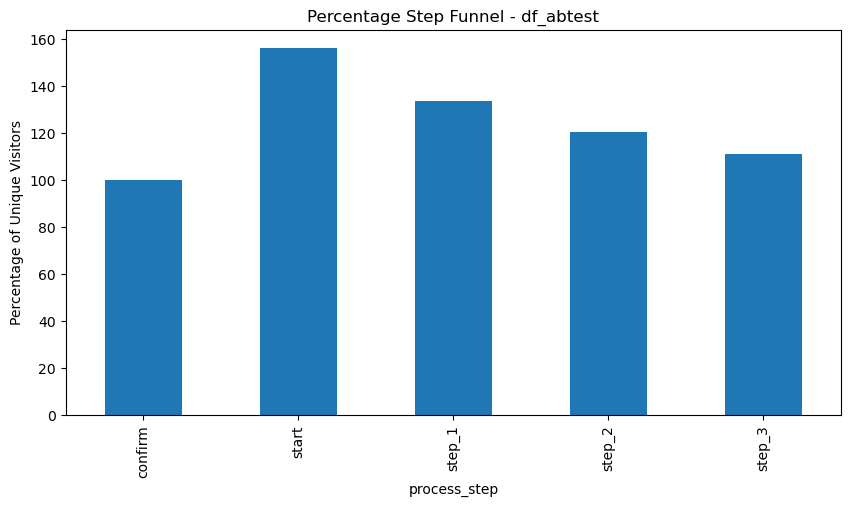

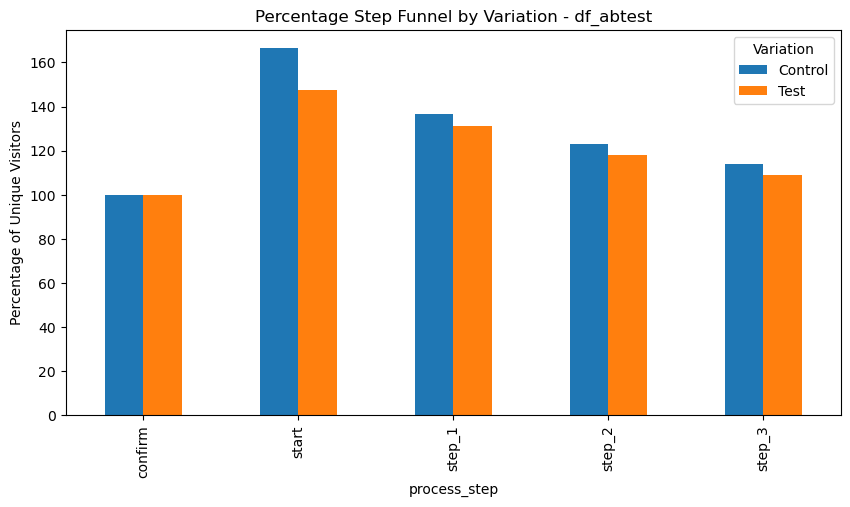

In [17]:
# Percentage funnel
funnel_abtest_pct = funnel_abtest / funnel_abtest.iloc[0] * 100
print(funnel_abtest_pct)

# Percentage funnel by Variation
funnel_abtest_variation_pct = funnel_abtest_variation.div(funnel_abtest_variation.iloc[0]) * 100
print(funnel_abtest_variation_pct)

# Plot
funnel_abtest_pct.plot(kind='bar', figsize=(10,5), title='Percentage Step Funnel - df_abtest')
plt.ylabel('Percentage of Unique Visitors')
plt.show()

funnel_abtest_variation_pct.plot(kind='bar', figsize=(10,5), title='Percentage Step Funnel by Variation - df_abtest')
plt.ylabel('Percentage of Unique Visitors')
plt.show()

In [18]:
# Age groups

bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25','25-34','35-44','45-54','55-64','65+']
df_abtest['age_group'] = pd.cut(df_abtest['clnt_age'], bins=bins, labels=labels)

# Tenure in months

df_abtest['tenure_months'] = df_abtest['clnt_tenure_yr']*12 + df_abtest['clnt_tenure_mnth']
df_abtest['tenure_group'] = pd.cut(df_abtest['tenure_months'], bins=[0,1,6,12,24,1000],
                                   labels=['<1m','1-6m','6-12m','1-2y','2y+'])


In [19]:
def funnel_by_demo(df, demo_col):
    # Count unique visitors per demographic
    demo_counts = df.groupby(demo_col)['visitor_simple'].nunique()
    
    # Count unique visitors reaching each process_step
    funnel = df.groupby([demo_col, 'process_step'])['visitor_simple'].nunique().unstack().fillna(0)
    
    # Step % relative to 'confirm'
    funnel_pct = funnel.div(funnel['confirm'], axis=0) * 100
    
    return demo_counts, funnel, funnel_pct

# Example: by age group
demo_counts_abtest, funnel_abtest, funnel_pct_abtest = funnel_by_demo(df_abtest, 'age_group')

print(funnel_pct_abtest)


process_step  confirm       start      step_1      step_2      step_3
age_group                                                            
<25             100.0  154.892966  131.574924  119.801223  108.486239
25-34           100.0  150.202265  129.463323  118.797195  107.874865
35-44           100.0  151.806828  129.075770  118.184846  108.109908
45-54           100.0  154.776978  132.863309  120.949640  110.762590
55-64           100.0  157.302921  134.827264  122.462318  114.872616
65+             100.0  170.602570  145.613646  120.425343  116.393443


/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_28532/162270467.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_counts = df.groupby(demo_col)['visitor_simple'].nunique()
/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_28532/162270467.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  funnel = df.groupby([demo_col, 'process_step'])['visitor_simple'].nunique().unstack().fillna(0)


In [20]:
def funnel_by_demo_variation(df, demo_col):
    funnel = df.groupby([demo_col, 'Variation', 'process_step'])['visitor_simple'].nunique().unstack().fillna(0)
    funnel_pct = funnel.div(funnel['confirm'], axis=0) * 100
    return funnel, funnel_pct

funnel_demo_var_abtest, funnel_pct_demo_var_abtest = funnel_by_demo_variation(df_abtest, 'age_group')

print(funnel_pct_demo_var_abtest)


process_step         confirm       start      step_1      step_2      step_3
age_group Variation                                                         
<25       Control      100.0  167.131648  135.745423  124.411508  112.554490
          Test         100.0  145.152542  128.135593  116.000000  105.152542
25-34     Control      100.0  159.938272  132.932099  123.919753  111.172840
          Test         100.0  142.557752  126.696833  114.765420  105.310788
35-44     Control      100.0  161.172977  131.588716  121.121010  109.910913
          Test         100.0  143.901708  126.880432  115.732694  106.592748
45-54     Control      100.0  161.346154  132.884615  122.083333  112.500000
          Test         100.0  149.259932  132.718774  119.942872  109.296287
55-64     Control      100.0  167.255075  136.481318  123.918800  116.887320
          Test         100.0  148.943405  133.373816  121.180471  113.164926
65+       Control      100.0  190.536437  154.605263  123.987854  120.040486

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_28532/3712596120.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  funnel = df.groupby([demo_col, 'Variation', 'process_step'])['visitor_simple'].nunique().unstack().fillna(0)


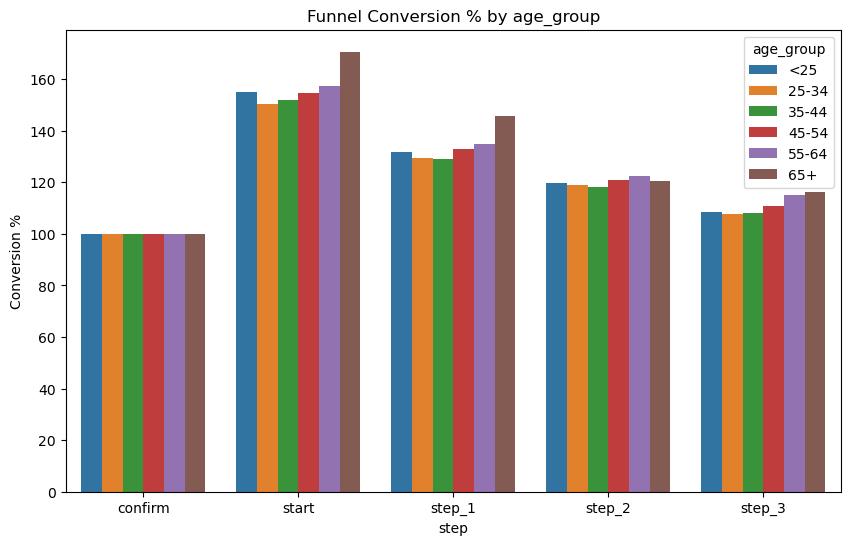

In [21]:
# Funnel by demographic
def plot_funnel(funnel_pct, demo_col):
    funnel_pct.reset_index(inplace=True)
    funnel_long = funnel_pct.melt(id_vars=demo_col, var_name='step', value_name='percent')
    
    plt.figure(figsize=(10,6))
    sns.barplot(x='step', y='percent', hue=demo_col, data=funnel_long)
    plt.title(f'Funnel Conversion % by {demo_col}')
    plt.ylabel('Conversion %')
    plt.show()

plot_funnel(funnel_pct_abtest, 'age_group')


Observations:
- All age groups start with 100% confirmed.
- The number of users decreases steadily through the steps of the funnel.
- Older age groups (55-64 and 65+) start with higher values at Start, but the drop-off in intermediate steps (Step 1 → Step 3) is more pronounced.
- Drop-off from Start → Step 3 is roughly 30–40 units for most groups, except 65+, where it’s ~54 units, indicating potential friction in later steps for the oldest users.

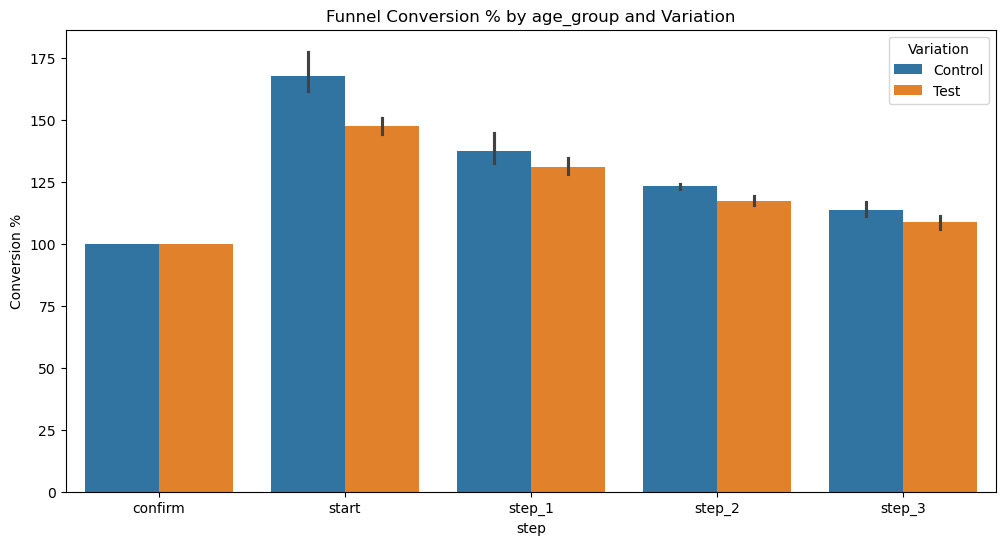

In [22]:
# Funnel by variation + demographic
def plot_funnel_variation(funnel_pct_demo_var, demo_col):
    funnel_pct_demo_var = funnel_pct_demo_var.reset_index()
    funnel_long = funnel_pct_demo_var.melt(id_vars=[demo_col,'Variation'], var_name='step', value_name='percent')
    
    plt.figure(figsize=(12,6))
    sns.barplot(x='step', y='percent', hue='Variation', data=funnel_long)
    plt.title(f'Funnel Conversion % by {demo_col} and Variation')
    plt.ylabel('Conversion %')
    plt.show()

plot_funnel_variation(funnel_pct_demo_var_abtest, 'age_group')

Observations:
- Test group consistently performs lower than Control at every step across all age groups.
- The difference is most pronounced at Start and Step 2, suggesting the variation negatively impacts early 
engagement and mid-funnel conversion.
- The drop-off pattern is similar in both Control and Test groups (step-to-step decline is consistent), 
indicating the funnel itself is behaving normally; the Test just has lower absolute numbers.
- Age-related effects persist: older users in both Control and Test have higher Start values, but also larger absolute drops, especially in Test (e.g., 65+ Test drops ~41 units from Start → Step 3).

**General conclusion on differences**

- df_merge and df_abtest are very similar in terms of overall average times.
- The main difference is that df_merge contains a ‘raw’ dataset, while df_abtest is more specific to A/B analysis.
- The patterns observed are consistent: Test users complete the steps faster than Control users, and this holds true across all age groups.
- The variations between the datasets are minimal and do not alter the conclusions of the behavioural analysis.

In [61]:
# Pivot the dataframe so each process_step becomes a column
df_pivot = df_abtest.pivot_table(
    index=['client_id', 'Variation', 'clnt_tenure_yr', 'age_group'],  # include any other identifiers you need
    columns='process_step',
    values='num_steps',  # numeric column representing progress in steps
    aggfunc='first'
).reset_index()

# Make sure column names are clean (flatten MultiIndex if any)
df_pivot.columns.name = None

# Define step order
steps = ['start', 'step_1', 'step_2', 'step_3',"confirm"]

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_28532/567843847.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df_abtest.pivot_table(


In [62]:
df_pivot

,client_id,Variation,clnt_tenure_yr,age_group,confirm,start,step_1,step_2,step_3
0,555,Test,3.0,25-34,5.0,5.0,5.0,5.0,5.0
1,647,Test,12.0,55-64,5.0,5.0,5.0,5.0,5.0
2,934,Test,9.0,45-54,NaN,4.0,NaN,NaN,NaN
3,1028,Control,12.0,35-44,NaN,9.0,9.0,9.0,9.0
4,1104,Control,5.0,45-54,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
50482,9999150,Test,5.0,25-34,NaN,3.0,3.0,NaN,NaN
50483,9999400,Test,7.0,25-34,5.0,5.0,5.0,5.0,5.0
50484,9999626,Test,9.0,25-34,NaN,2.0,2.0,NaN,NaN
50485,9999729,Test,10.0,25-34,5.0,2.0,2.0,5.0,5.0


In [63]:
# Which age groups drop off most at which step?
# Create drop-off columns
for i in range(len(steps)-1):
    df_pivot[f'drop_{steps[i]}_{steps[i+1]}'] = (df_pivot[steps[i]] - df_pivot[steps[i+1]]) / df_pivot[steps[i]]


In [65]:
#Drop-offs by age group
age_drop = df_pivot.groupby(['Variation', 'age_group'])[
    [col for col in df_pivot.columns if col.startswith('drop_')]
].mean()

print("\nAverage drop-off by Variation and Age Group:\n", age_drop)


Average drop-off by Variation and Age Group:
                      drop_start_step_1  drop_step_1_step_2  \
Variation age_group                                          
Control   <25                -0.251045           -0.041817   
          25-34              -0.216455           -0.038453   
          35-44              -0.248055           -0.061117   
          45-54              -0.270911           -0.054303   
          55-64              -0.337300           -0.087821   
          65+                -0.345982           -0.107245   
Test      <25                -0.148253           -0.029490   
          25-34              -0.103231           -0.032555   
          35-44              -0.125621           -0.037949   
          45-54              -0.146831           -0.050694   
          55-64              -0.174859           -0.058067   
          65+                -0.176645           -0.072144   

                     drop_step_2_step_3  drop_step_3_confirm  
Variation age_group  

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_28532/62968642.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_drop = df_pivot.groupby(['Variation', 'age_group'])[


In [66]:
# Convert all drop-off columns to absolute values
drop_cols = [col for col in df_pivot.columns if col.startswith('drop_')]
df_pivot[drop_cols] = df_pivot[drop_cols].abs()

# Recalculate averages by Variation and Age Group
age_drop_pos = df_pivot.groupby(['Variation', 'age_group'])[drop_cols].mean()
print("\nAverage drop-off by Variation and Age Group (positive values):\n", age_drop_pos)



Average drop-off by Variation and Age Group (positive values):
                      drop_start_step_1  drop_step_1_step_2  \
Variation age_group                                          
Control   <25                 0.252232            0.043914   
          25-34               0.217860            0.039687   
          35-44               0.251847            0.062076   
          45-54               0.273054            0.054977   
          55-64               0.340162            0.089266   
          65+                 0.348762            0.108637   
Test      <25                 0.149173            0.030886   
          25-34               0.103872            0.034049   
          35-44               0.127391            0.041054   
          45-54               0.148266            0.051893   
          55-64               0.176321            0.060840   
          65+                 0.177938            0.075606   

                     drop_step_2_step_3  drop_step_3_confirm  
Var

/var/folders/bp/q0jpdzq126j54kx_lzjc4dcm0000gn/T/ipykernel_28532/1759744608.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_drop_pos = df_pivot.groupby(['Variation', 'age_group'])[drop_cols].mean()


**Interpretation**:

1️⃣ General Trend

- Test variation consistently has lower drop-offs at the early steps (start → step_1 and step_1 → step_2) compared to Control.
- Example: for age 25–34, Control loses ~22% at step 1, Test only ~10%.
- Control tends to have higher early drop-offs, meaning the Test variation is better at retaining users at the start of the funnel.

2️⃣ Age Group Differences

- Older users drop off more at early steps in Control:
- 55–64: 34% lost at start → step_1
- 65+: 35% lost at start → step_1
- In Test, the early-step drop-off for older users is reduced (~17–18%), showing the Test variation improves retention for all age groups, but especially for older users.

3️⃣ Later Steps

- Drop-offs from step_2 → step_3 are generally low (<2% in most cases) for both variations, so most users who reach step_2 continue.
- Drop-offs at step_3 → confirm show an interesting pattern:
- Control is low for younger users (~1–3%), slightly higher for older users (~3–4%).
- Test is higher here, especially for older users: 65+ ~9%, meaning more users in Test abandon at the very last step.

4️⃣ Key Takeaways

- Test reduces early abandonment, making it more effective at engaging users from the start.
- Older users benefit most from the Test variation at early steps, but they also show higher abandonment at the final “confirm” step in Test.
- The funnel is tight from step_2 onward; the main challenge is start → step_1, followed by the final confirmation for Test.

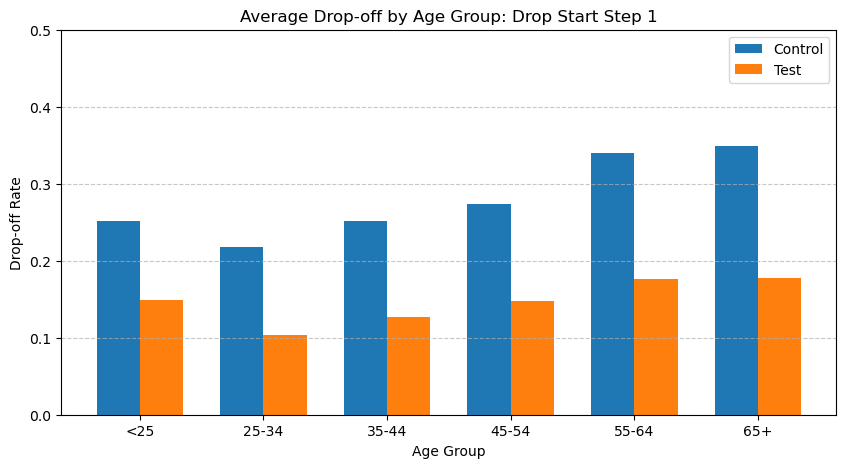

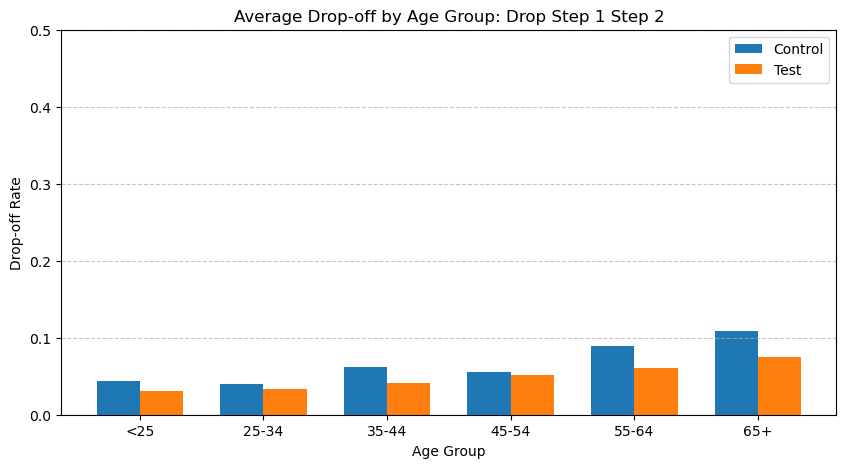

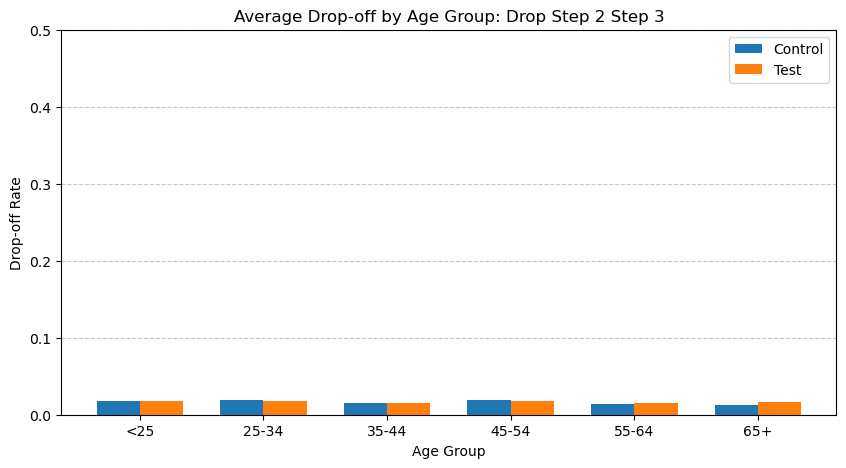

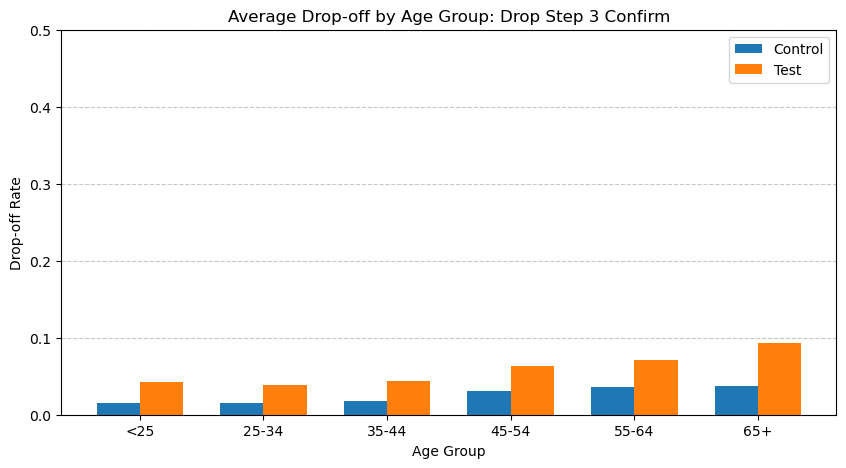

In [67]:
# Average drop-off by age group - Visualization

# Loop through steps to create a chart for each
for step in drop_cols:
    plt.figure(figsize=(10, 5))
    
    age_groups = age_drop_pos.index.get_level_values('age_group').unique()
    x = np.arange(len(age_groups))  # positions for age groups
    width = 0.35  # width of bars
    
    control_values = age_drop_pos.loc['Control', step].values
    test_values = age_drop_pos.loc['Test', step].values
    
    plt.bar(x - width/2, control_values, width, label='Control')
    plt.bar(x + width/2, test_values, width, label='Test')
    
    plt.xticks(x, age_groups)
    plt.ylabel('Drop-off Rate')
    plt.xlabel('Age Group')
    plt.title(f'Average Drop-off by Age Group: {step.replace("_", " ").title()}')
    plt.ylim(0, 0.5)  # Adjust according to your data
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [68]:
# Define tenure groups based on median from df_abtest
median_tenure = df_abtest['clnt_tenure_mnth'].median()


In [69]:
df_pivot['tenure_group'] = df_abtest['clnt_tenure_mnth'].apply(
    lambda x: 'less-tenured' if x <= median_tenure else 'more-tenured'
)

# Group by Variation and tenure_group
tenure_drop = df_pivot.groupby(['Variation', 'tenure_group'])[
    [col for col in df_pivot.columns if col.startswith('drop_')]
].mean()

print("\nAverage drop-off by Variation and Tenure Group:\n", tenure_drop)


Average drop-off by Variation and Tenure Group:
                         drop_start_step_1  drop_step_1_step_2  \
Variation tenure_group                                          
Control   less-tenured           0.287546            0.069534   
          more-tenured           0.275916            0.063396   
Test      less-tenured           0.143875            0.047764   
          more-tenured           0.146880            0.051474   

                        drop_step_2_step_3  drop_step_3_confirm  
Variation tenure_group                                           
Control   less-tenured            0.016770             0.026897  
          more-tenured            0.015677             0.025559  
Test      less-tenured            0.014544             0.059363  
          more-tenured            0.018772             0.056639  


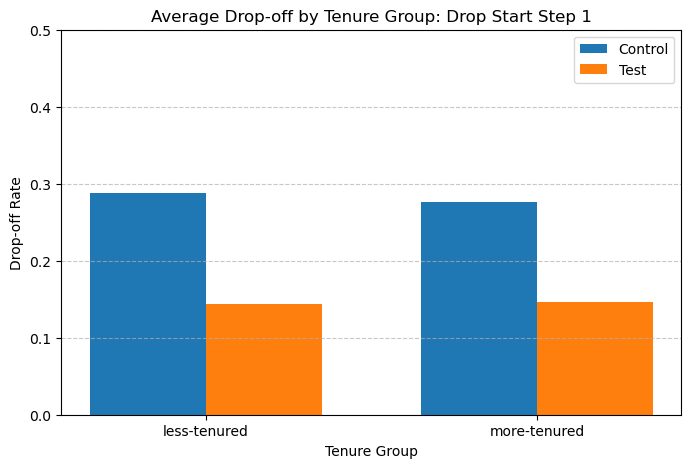

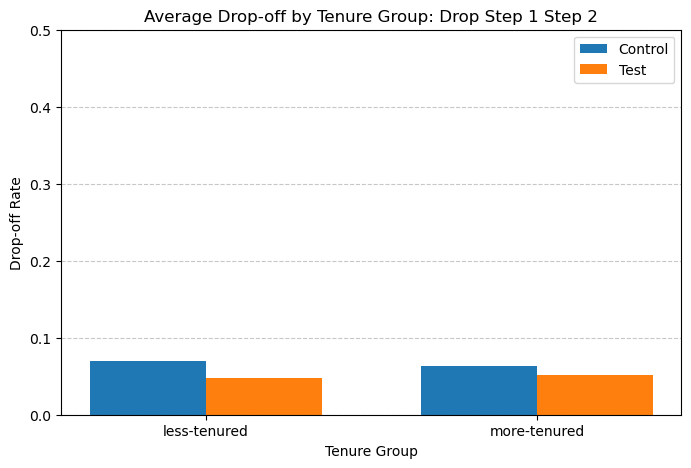

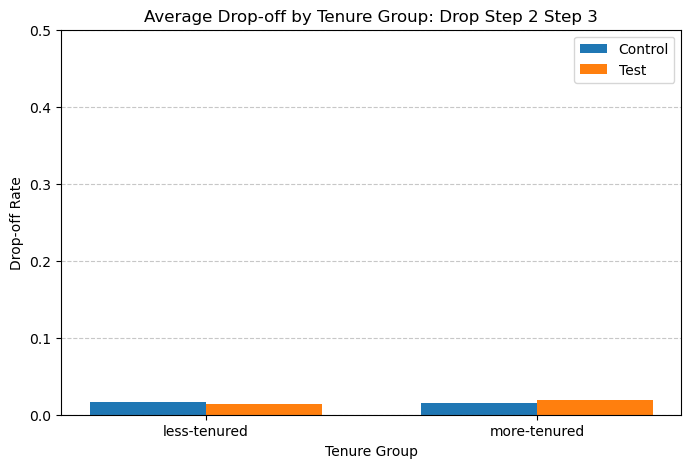

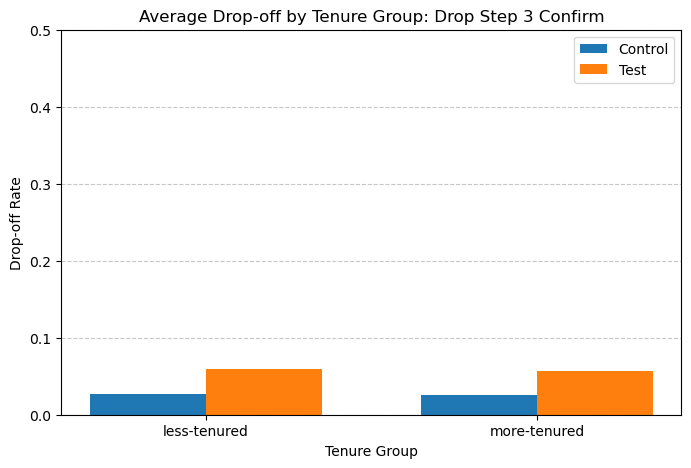

In [74]:
# Loop through steps to create a chart for each
for step in drop_cols:
    plt.figure(figsize=(8, 5))
    
    tenure_groups = tenure_drop.index.get_level_values('tenure_group').unique()
    x = np.arange(len(tenure_groups))  # positions for tenure groups
    width = 0.35  # width of bars
    
    control_values = tenure_drop.loc['Control', step].values
    test_values = tenure_drop.loc['Test', step].values
    
    plt.bar(x - width/2, control_values, width, label='Control')
    plt.bar(x + width/2, test_values, width, label='Test')
    
    plt.xticks(x, tenure_groups)
    plt.ylabel('Drop-off Rate')
    plt.xlabel('Tenure Group')
    plt.title(f'Average Drop-off by Tenure Group: {step.replace("_", " ").title()}')
    plt.ylim(0, 0.5)  # adjust according to your data
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

**Interpretation**

1. Early Steps (start → step_1, step_1 → step_2)

- The Test variation significantly reduces early drop-offs compared to Control for both less-tenured and more-tenured clients.
- Example: start → step_1: Control ~28%, Test ~14–15%.
- This shows that Test retains users better from the beginning, regardless of tenure.

2. Middle Step (step_2 → step_3)

- Drop-offs are very low (<2%) for all groups, indicating that users who reach step_2 tend to continue.
- Final Step (step_3 → confirm)
- Interestingly, Test shows higher drop-off at the final confirmation (~5–6%) compared to Control (~2–3%), for both tenure groups.
- So, while Test improves early retention, some users abandon at the very last step.

3. Tenure Differences

- Differences between less-tenured and more-tenured are minimal, except for slightly higher last-step drop-offs in Test.

***Key takeaway:*** Test improves early retention across all tenure groups, but the final confirmation step remains a point of abandonment.

**RESUME**

1.- The primary clients using this online process are **older**.

- Most users are in the **45–64** and **65+** age groups.

2.- The majority of clients are **long-standing**.

- The **median tenure is ~11.5 years**, indicating many long-term customers.

3.- The process is mainly used by **established, experienced clients** rather than new or younger users.

In [76]:
df_pivot.to_csv("df_pivot.csv", index=False)